## Computational Homework 5

In this assignment, we will use the diagnostic tools we have discussed to determine if the Gaussian model of linear regression is appropriate for a given dataset. 

For this, we will need to download the file `hw5_data.pkl` from [this link](https://drive.google.com/drive/folders/1OkXMcFo0urN0kSQYH4d75I4V3pnSpV6H?usp=sharing).

Once downloaded (and saved in the same directory as this notebook), the file can be loaded using the following.

In [1]:
import pickle 

with open('hw5_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
data

{'X': array([[0.58231218, 0.65887683, 0.67009968, ..., 0.16247659, 0.63714974,
         0.04502166],
        [0.07078953, 0.49464477, 0.77369583, ..., 0.96132812, 0.0252143 ,
         0.71269283],
        [0.34361051, 0.69163828, 0.79827682, ..., 0.15908261, 0.7295746 ,
         0.1079456 ],
        ...,
        [0.94118786, 0.69139472, 0.00322521, ..., 0.66819908, 0.87952072,
         0.2280973 ],
        [0.02321873, 0.63488777, 0.83716621, ..., 0.81930846, 0.58995066,
         0.38185381],
        [0.32753494, 0.31550366, 0.33145638, ..., 0.11918291, 0.23841417,
         0.48214622]]),
 'y1': array([6.25331714, 5.06015954, 4.88234813, 5.06676296, 4.82458702,
        6.60245745, 4.47891032, 3.90727416, 3.97345761, 5.52769143,
        4.59949073, 4.72314214, 3.88310939, 4.11006087, 5.23885321,
        5.65028678, 6.37608324, 3.77471305, 4.53434048, 5.6784916 ,
        3.94249844, 6.25660186, 4.25954492, 3.42927816, 5.52193496,
        4.76513602, 4.75242015, 4.53657805, 4.97795724, 5.

This file contains 1 feature matrix `X` and 3 vectors of responses, `y1`, `y2` and `y3`. They can be loaded as numpy arrays using the following.

In [2]:
X = data["X"]
y1 = data["y1"]
y2 = data["y2"]
y3 = data["y3"]
print(X.shape, y1.shape, y2.shape, y3.shape)

(500, 20) (500,) (500,) (500,)


As we can see, each dataset consists of $n=500$ examples, and $p=20$ features. (Note, the three datasets here are `(X,y1)`, `(X,y2)` and `(X,y3)` -- so the features are the same for each, but the response vectors are different).

The datasets have the following properties:

- One of the datasets follows a linear model $y = X\beta + \varepsilon$, but $\varepsilon$ is _not_ normally distributed.
- One of the datasets has errors which appear to follow a normal distribution, but the model is not linear.
- One of the datasets follows a linear model and has normally distributed errors. 

Your task is to correctly label which of the three models fits which description, using the two diagnostic tools discussed in lab: QQ plots and residual-fitted value plots (see the [online book](https://rythei.github.io/linear-models/content/basic_linear_regression/diagnostics.html) for examples).

For each of the three datasets, you should create a both the QQ plot and residual-fitted value plot, and explain how you determine which description fits each based on these plots.

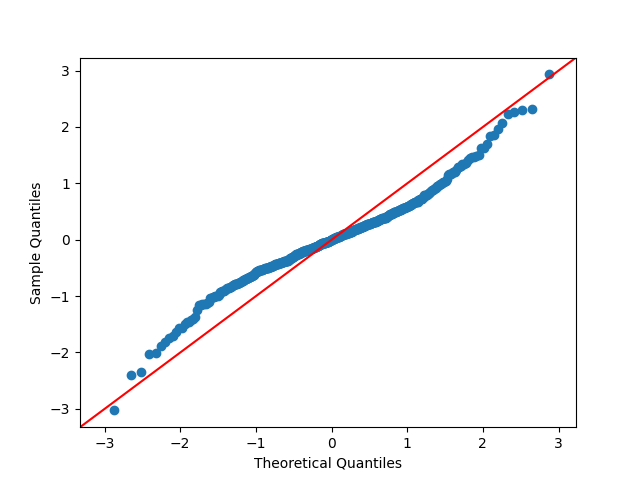

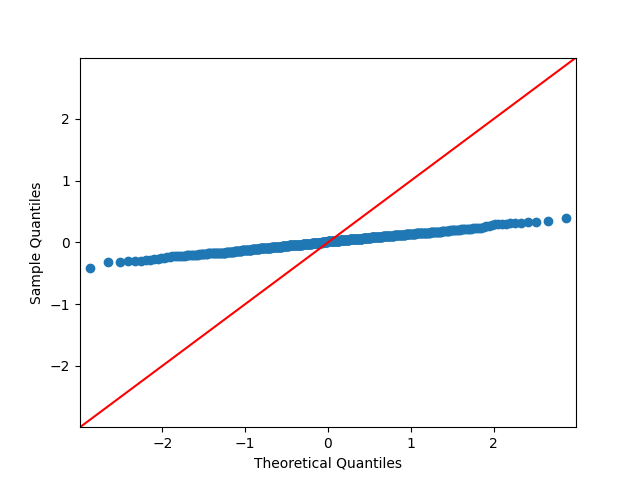

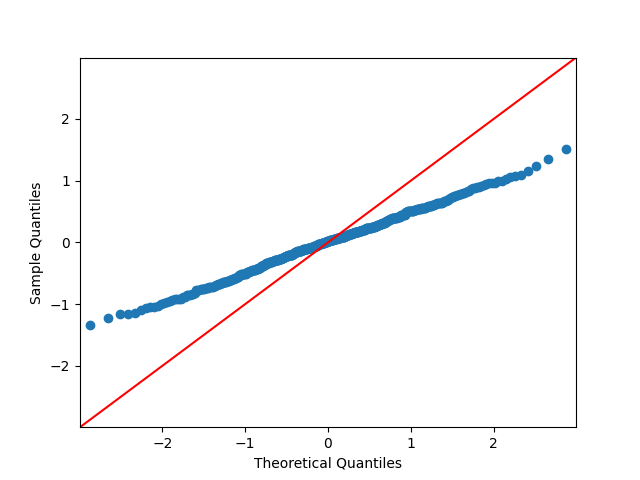

In [8]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# QQ plot for (X,y1)
beta_hat1 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y1))
y_hat1 = np.dot(X, beta_hat1)
r1 = y1-y_hat1
fig1 = sm.qqplot(r1, line="45")
plt.show()

# QQ plot for (X,y2)
beta_hat2 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y2))
y_hat2 = np.dot(X, beta_hat2)
r2 = y2-y_hat2
fig2 = sm.qqplot(r2, line="45")
plt.show()

# QQ plot for (X,y3)
beta_hat3 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y3))
y_hat3 = np.dot(X, beta_hat3)
r3 = y3-y_hat3
fig3 = sm.qqplot(r3, line="45")
plt.show()

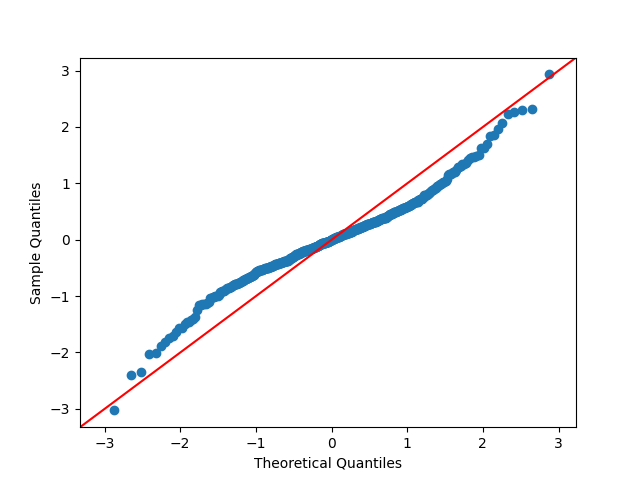

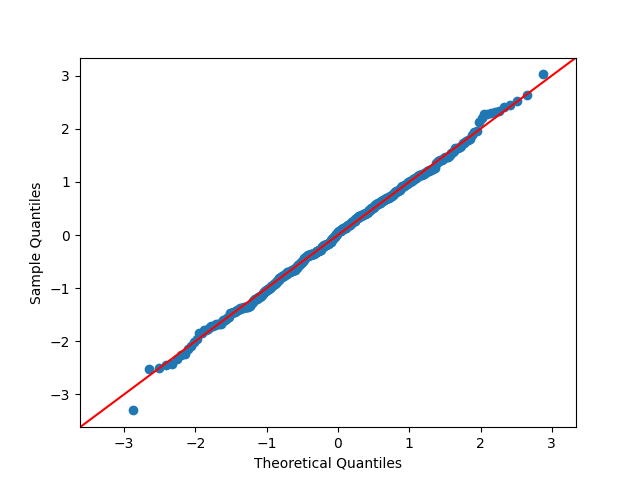

/lib/python3.10/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


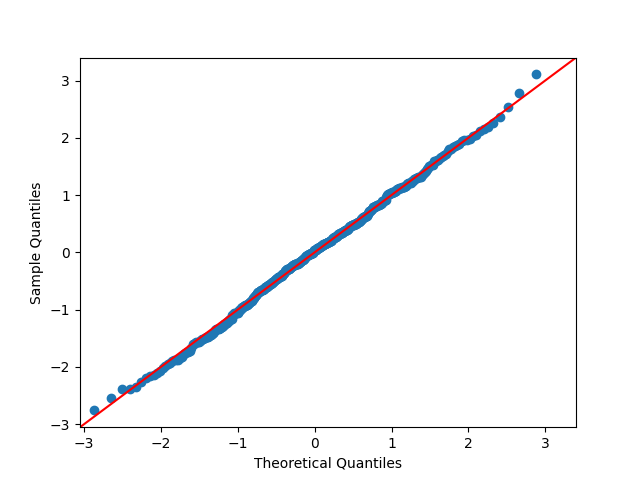

In [15]:
# QQ plot for adjusted (X,y1)
# no adjustment since plots do not lie on one line
beta_hat1 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y1))
y_hat1 = np.dot(X, beta_hat1)
r1 = y1-y_hat1
fig1 = sm.qqplot(r1, line="45")
plt.show()

# QQ plot for adjusted (X,y2)
# plots do lie on one line, indicating that error follows nonstandard normal distribution, so adjusted with t_(n-1) distribution
import scipy.stats as stats
beta_hat2 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y2))
y_hat2 = np.dot(X, beta_hat2)
r2 = y2-y_hat2
fig2 = sm.qqplot(r2, dist=stats.t, distargs=(X.shape[0]-1,), fit=True, line="45")
plt.show()

# QQ plot for adjusted (X,y3)
# plots do lie on one line, indicating that error follows nonstandard normal distribution, so adjusted with t_(n-1) distribution
beta_hat3 = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y3))
y_hat3 = np.dot(X, beta_hat3)
r3 = y3-y_hat3
fig3 = sm.qqplot(r3, dist=stats.t, distargs=(X.shape[0]-1,), fit=True, line="45")
plt.show()

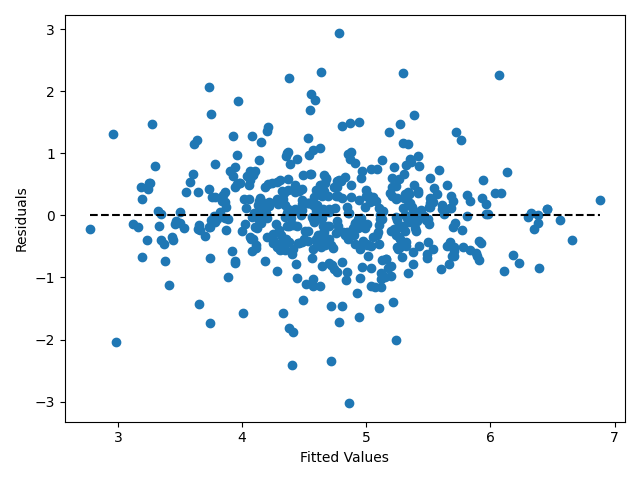

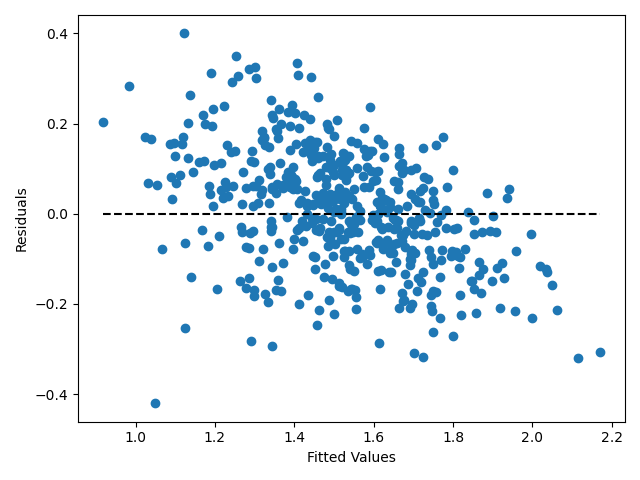

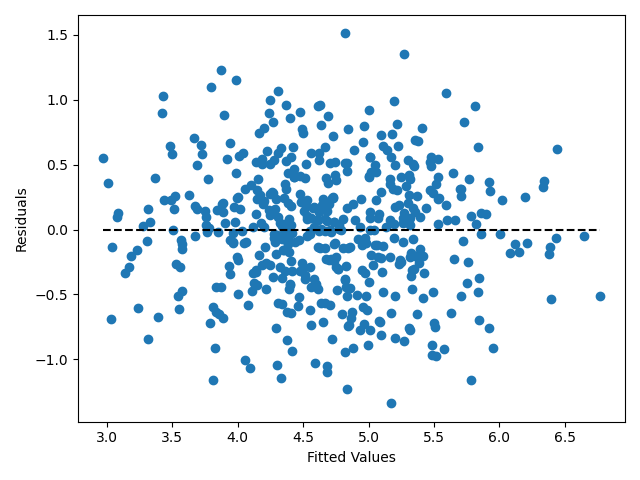

In [16]:
# residual-fitted value plot for (X,y1)
plt.scatter(y_hat1, r1)
plt.hlines(0, np.min(y_hat1), np.max(y_hat1), color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# residual-fitted value plot for (X,y2)
plt.scatter(y_hat2, r2)
plt.hlines(0, np.min(y_hat2), np.max(y_hat2), color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# residual-fitted value plot for (X,y3)
plt.scatter(y_hat3, r3)
plt.hlines(0, np.min(y_hat3), np.max(y_hat3), color='black', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [17]:
# (X,y1) is the dataset that follows a linear model but its error is not normally distributed. 
# Its QQ plot does not fit, which indicates its error does not have a normal distribution. 
# The residual-fitted values of the model are randomly scattered above and below the 0-line and show no pattern, which indicates it follows a linear model.

# (X,y2) is the dataset that has errors which appear to follow a normal distribution, but the model is not linear. 
# Its adjusted QQ plot does fit, which indicates its error does have a normal distribution. 
# The residual-fitted values of its models show a decreasing trend, which indicates it does not follow a linear model.

# (X,y3) is the dataset that follows a linear model and has normally distributed errors. 
# Its adjusted QQ plots does fit, which indicates its error does have a normal distribution. 
# The residual-fitted values of the model are randomly scattered above and below the 0-line and show no pattern, which indicates it follows a linear model..